# 알고리즘 및 실습 실습과제 4 - ()

## [문제 1] 교재 3장 연습문제 문제 11번(134쪽)을 해결하시오.
 * (1)번은 동영상에 코드까지 제공하고 있음.
 * (2)번은 방법을 설명하고 있는데, 알고리즘을 만들어 구현하고 테스트해 볼 것.

### [문제 1, 134P-11] 입력으로 주어진 문자열에서 A로 시작하고 B로 끝나는 부분 문자열(substring)의 개수를 구하는 문제가 주어졌다. 예를 들어, 문자열 ADBAAEDBA에는 4개의 부분 문자열이 있다. <u>ADB</u>AAEDBA, <u>ADBAAEDB</u>A, ADBA<u>AEDB</u>A, ADBA<u>AEDB</u>A이다.

In [ ]:
import random

generate_string = lambda length, string_set: ''.join([random.choice(string_set) for _ in range(length)])
EXAMPLE_STRING = 'ADBAAEDBA'
RANDOM_STRING1 = generate_string(10, 'ABCD')
RANDOM_STRING2 = generate_string(30, 'ABCDEF')
print(RANDOM_STRING1, RANDOM_STRING2)

BACCBADBCB FCFCDAEADFEFDDBCEFAEDACDDDAABA


#### [문제 1, 134P-11-(1)] 이 문제에 대한 억지 기법 알고리즘을 설계하고, 시간 복잡도를 계산하라.

In [ ]:
def find_with_bruteforce(input, start, end):
    count = 0
    length = len(input)
    for i in range(length - 1):
        if input[i] == start:
            for j in range(i + 1, length):
                if input[j] == end:
                    count += 1
    return count

print(EXAMPLE_STRING, find_with_bruteforce(EXAMPLE_STRING, 'A', 'B'))
print(RANDOM_STRING1, find_with_bruteforce(RANDOM_STRING1, 'A', 'B'))
print(RANDOM_STRING2, find_with_bruteforce(RANDOM_STRING2, 'A', 'B'))

ADBAAEDBA 4
BACCBADBCB 5
FCFCDAEADFEFDDBCEFAEDACDDDAABA 8


기본 연산으로 비교 연산 `input[i] == end`과 `input[j] == end`를 사용하고, 길이 `n`의 문자열이 `A`, `B`, `C` 3개의 문자로만 구성되었다고 가정하자, 구현된 억지 기법의 알고리즘은 입력 자료의 구성에 따라 시간 복잡도가 달라질 수 있다.

##### 최선의 경우
가장 유리한 입력은 `A`가 아닌 문자로 문자열이 구성된 경우이다. 이 경우 첫번째 반복문 내부에 위치한 조건문 내부로 진입하지 않으므로 기본 연산이 입력 n에 대해서 n-1번만 실행되고 종료된다. 따라서 복잡도는 $T_{best}(n)=n-1$이고, Big-O 표기법으로 표시하면 $O(T_{best}(n))=O(n-1)=O(n)$이다.

##### 최악의 경우
가장 유리한 입력은 `A` 문자로 문자열이 전부 구성된 경우이다. 이 경우 첫번째 반복문 내부에 위치한 조건문 내부에 항상 진입하여, 두번째 반복문(과 기본 연산)을 `n - (i + 1)`번 실행한다. 따라서 복잡도는 $T_{worst}(n)=\displaystyle \sum_{i=0}^{n-2}\sum_{j=i+1}^{n-1}1=\sum_{i=1}^{n-1}\sum_{j=1}^{n-i}1=\frac{1}{2}n(n-1)$이고 Big-O 표기법으로 표시하면 $O(T_{worst}(n))=O(\frac{1}{2}n(n-1))=O(n^2)$이다.

#### [문제 1, 134P-11-(2)] 이 문제에 대한 더 효율적인 알고리즘을 찾아보라.

In [ ]:
def find_advanced(input, start, end):
    totalCount = 0;
    startCount = 0;
    for c in input:
        if c == start:
            startCount += 1
        elif c == end:
            totalCount += startCount;

    return totalCount

print(EXAMPLE_STRING, find_advanced(EXAMPLE_STRING, 'A', 'B'))
print(RANDOM_STRING1, find_advanced(RANDOM_STRING1, 'A', 'B'))
print(RANDOM_STRING2, find_advanced(RANDOM_STRING2, 'A', 'B'))

ADBAAEDBA 4
BACCBADBCB 5
FCFCDAEADFEFDDBCEFAEDACDDDAABA 8


위의 구현한 알고리즘은, A의 수를 세고 있다가 B를 만날 때 집계하여 계산하므로 반복문을 중첩하지 않고 사용하고, 따라서 `O(n)`의 시간 복잡도로 작동하여 억지 기법으로 구현한 알고리즘보다 효율적이다.

# [문제 2] 교재 3장 연습문제 문제 27(137쪽)을 (1)번이나 (2)번 중에서 하나를 선택하여 구현하시오.

### [문제 2, 137P-27] 이분 그래프(biparite graph)는 정점의 집합을 두 개의 부분집합 X와 Y로 분할할 수 있고, 모든 간선의 한 끝점은 X에 다른 끝점은 Y에 속하도록 할 수 있는 그래프를 말한다. 예를 들어, 다음은 이분 그래프와 그렇지 않은 그래프의 예를 보여준다. 물음에 답하라.

![](https://private_raw.abstr.net/assignment/anp/04/graph1.png)

In [ ]:
import networkx as nx
import numpy as np
import random
import string

# 이분 그래프 행렬 배열을 생성
get_bipartite_matrix = lambda: nx.to_numpy_matrix(
    nx.complete_bipartite_graph(random.randint(2, 10), random.randint(2, 10))).tolist()

# 랜덤한 무향 그래프 행렬 배열을 생성
def get_random_matrix():
    size = random.randint(2, 10)
    matrix = nx.to_numpy_matrix(get_graph(np.random.randint(2, size=(size, size))).to_undirected())
    for i in range(size):
        matrix[i, i] = 0;
    return matrix.tolist()

# 그래프 행렬을 dictionary 꼴로 변환
def matrix_to_dict(matrix):
    size = len(matrix)
    d = {}
    for x in range(size):
        xx = string.ascii_uppercase[x]
        d[xx] = []
        for y in range(size):
            yy = string.ascii_uppercase[y]
            if matrix[x][y] == 1:
                d[xx].append(yy)
    return d

# 인접 행렬을 받아 라벨링하여 networkx graph로 반환
def get_graph(raw_matrix):
    G = nx.from_numpy_matrix(np.matrix(raw_matrix))
    return nx.relabel_nodes(G, dict(zip(G, string.ascii_uppercase)))

{'A': ['B', 'D', 'F'], 'B': ['A', 'C', 'E'], 'C': ['B', 'D', 'F', 'H'], 'D': ['A', 'C', 'E', 'G'], 'E': ['B', 'D', 'H'], 'F': ['A', 'C', 'G'], 'G': ['D', 'F', 'H'], 'H': ['C', 'E', 'G']}


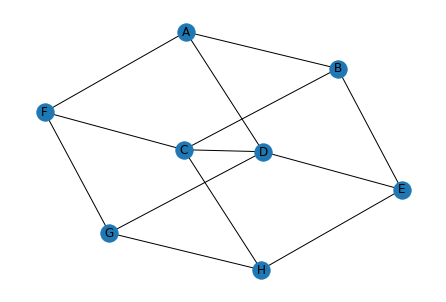

In [ ]:
                 #  A  B  C  D  E  F  G  H
EXAMPLE_MATRIX1 = [[0, 1, 0, 1, 0, 1, 0, 0],
                   [1, 0, 1, 0, 1, 0, 0, 0],
                   [0, 1, 0, 1, 0, 1, 0, 1],
                   [1, 0, 1, 0, 1, 0, 1, 0],
                   [0, 1, 0, 1, 0, 0, 0, 1],
                   [1, 0, 1, 0, 0, 0, 1, 0],
                   [0, 0, 0, 1, 0, 1, 0, 1],
                   [0, 0, 1, 0, 1, 0, 1, 0]]
EXAMPLE_DICT1 = matrix_to_dict(EXAMPLE_MATRIX1)
EXAMPLE_GRAPH1 = get_graph(EXAMPLE_MATRIX1)
nx.draw(EXAMPLE_GRAPH1, with_labels=True)
print(EXAMPLE_DICT1)
# 교재의 이분 그래프 예제

{'A': ['B', 'C', 'D'], 'B': ['A', 'C'], 'C': ['A', 'B', 'D'], 'D': ['A', 'C']}


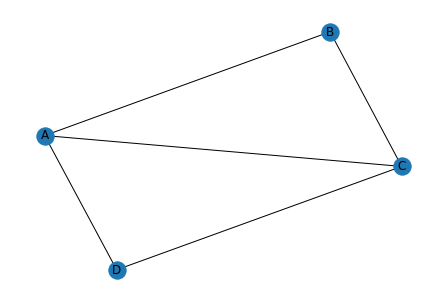

In [ ]:
                 #  A  B  C  D
EXAMPLE_MATRIX2 = [[0, 1, 1, 1],
                   [1, 0, 1, 0],
                   [1, 1, 0, 1],
                   [1, 0, 1, 0]]
EXAMPLE_DICT2 = matrix_to_dict(EXAMPLE_MATRIX2)
EXAMPLE_GRAPH2 = get_graph(EXAMPLE_MATRIX2)
nx.draw(EXAMPLE_GRAPH2, with_labels=True)
print(EXAMPLE_DICT2)
# 교재의 이분 그래프가 아닌 그래프 예제

In [ ]:
RANDOM_MATRIX1 = get_bipartite_matrix()
RANDOM_GRAPH1 = get_graph(RANDOM_MATRIX1)
RANDOM_DICT1 = matrix_to_dict(RANDOM_MATRIX1)

RANDOM_MATRIX2 = get_bipartite_matrix()
RANDOM_GRAPH2 = get_graph(RANDOM_MATRIX2)
RANDOM_DICT2 = matrix_to_dict(RANDOM_MATRIX2)
# 랜덤 생성한 이분 그래프

RANDOM_MATRIX3 = get_random_matrix()
RANDOM_GRAPH3 = get_graph(RANDOM_MATRIX3)
RANDOM_DICT3 = matrix_to_dict(RANDOM_MATRIX3)

RANDOM_MATRIX4 = get_random_matrix()
RANDOM_GRAPH4 = get_graph(RANDOM_MATRIX4)
RANDOM_DICT4 = matrix_to_dict(RANDOM_MATRIX4)
# 랜덤 생성한 그래프

{'A': ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], 'B': ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], 'C': ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], 'D': ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], 'E': ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], 'F': ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], 'G': ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], 'H': ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], 'I': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], 'J': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], 'K': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], 'L': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], 'M': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], 'N': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], 'O': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], 'P': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']}


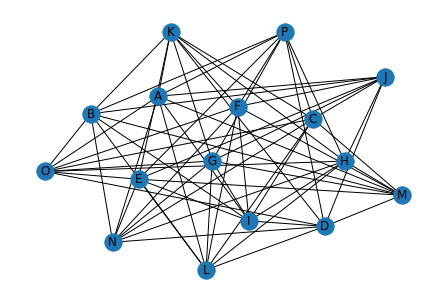

In [ ]:
nx.draw(RANDOM_GRAPH1, with_labels=True)
print(RANDOM_DICT1)

{'A': ['K', 'L', 'M', 'N', 'O', 'P', 'Q'], 'B': ['K', 'L', 'M', 'N', 'O', 'P', 'Q'], 'C': ['K', 'L', 'M', 'N', 'O', 'P', 'Q'], 'D': ['K', 'L', 'M', 'N', 'O', 'P', 'Q'], 'E': ['K', 'L', 'M', 'N', 'O', 'P', 'Q'], 'F': ['K', 'L', 'M', 'N', 'O', 'P', 'Q'], 'G': ['K', 'L', 'M', 'N', 'O', 'P', 'Q'], 'H': ['K', 'L', 'M', 'N', 'O', 'P', 'Q'], 'I': ['K', 'L', 'M', 'N', 'O', 'P', 'Q'], 'J': ['K', 'L', 'M', 'N', 'O', 'P', 'Q'], 'K': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'L': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'M': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'N': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'O': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'P': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'Q': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']}


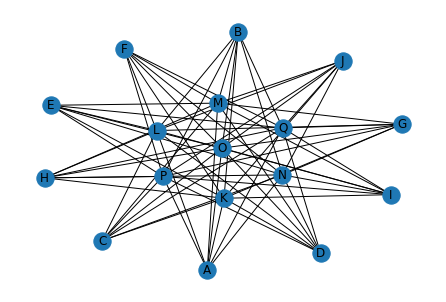

In [ ]:
nx.draw(RANDOM_GRAPH2, with_labels=True)
print(RANDOM_DICT2)

{'A': ['C', 'D'], 'B': ['D'], 'C': ['A', 'D'], 'D': ['A', 'B', 'C']}


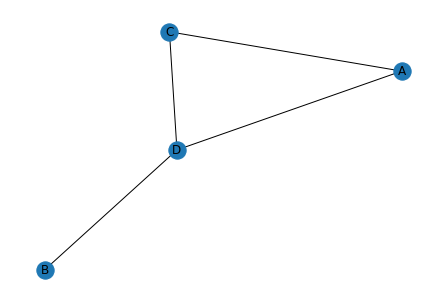

In [ ]:
nx.draw(RANDOM_GRAPH3, with_labels=True)
print(RANDOM_DICT3)

{'A': ['B', 'C', 'E', 'F'], 'B': ['A', 'C', 'D', 'E', 'F'], 'C': ['A', 'B', 'D'], 'D': ['B', 'C', 'F'], 'E': ['A', 'B', 'F'], 'F': ['A', 'B', 'D', 'E']}


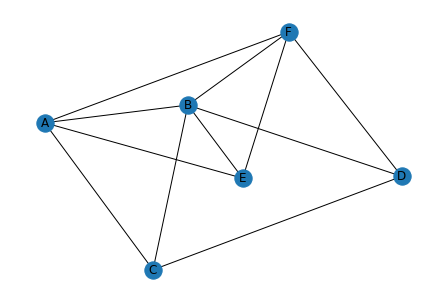

In [ ]:
nx.draw(RANDOM_GRAPH4, with_labels=True)
print(RANDOM_DICT4)

#### [문제 2, 137P-27-(1)] 깊이 우선 탐색을 이용해 주어진 그래프가 이분 그래프인지를 판단하는 알고리즘을 설계하라.
#### [문제 2, 137P-27-(2)] 너비 우선 탐색을 이용해 주어진 그래프가 이분 그래프인지를 판단하는 알고리즘을 설계하라.

In [ ]:
def is_bipartite_graph(graph_dict, type='dfs'):
    color_dict = {}
    visited = []
    queue_or_stack = [list(graph_dict.keys())[0]]
    currentColor = True
    # True Color, False Color 두가지로 컬러링
    while queue_or_stack:
        key = queue_or_stack.pop() if type == 'dfs' else queue_or_stack.pop(0)
        # type 매개변수를 통해 DFS, BFS 방식 결정
        if key not in visited:
            if key not in color_dict:
                color_dict[key] = currentColor
            currentColor = color_dict[key]
            currentColor = not currentColor
            for child in graph_dict[key]:
                if child not in color_dict:
                    color_dict[child] = currentColor
                elif color_dict[child] != currentColor:
                    return False

            visited.append(key)
            queue_or_stack.extend(graph_dict[key])
    return True

print('EXAMPLE1 (BIPARTITE, DFS)', is_bipartite_graph(EXAMPLE_DICT1, 'dfs'))
print('EXAMPLE1 (BIPARTITE, BFS)', is_bipartite_graph(EXAMPLE_DICT1, 'bfs'))
print('EXAMPLE2 (NON-BIPARTITE, DFS)', is_bipartite_graph(EXAMPLE_DICT2, 'dfs'))
print('EXAMPLE2 (NON-BIPARTITE, BFS)', is_bipartite_graph(EXAMPLE_DICT2, 'bfs'))
print('RANDOM1 (BIPARTITE RANDOM, DFS)', is_bipartite_graph(RANDOM_DICT1, 'dfs'))
print('RANDOM1 (BIPARTITE RANDOM, BFS)', is_bipartite_graph(RANDOM_DICT1, 'bfs'))
print('RANDOM2 (BIPARTITE RANDOM, DFS)', is_bipartite_graph(RANDOM_DICT2, 'dfs'))
print('RANDOM2 (BIPARTITE RANDOM, BFS)', is_bipartite_graph(RANDOM_DICT2, 'bfs'))
print('RANDOM3 (DFS)', is_bipartite_graph(RANDOM_DICT3, 'dfs'))
print('RANDOM3 (BFS)', is_bipartite_graph(RANDOM_DICT3, 'bfs'))
print('RANDOM4 (DFS)', is_bipartite_graph(RANDOM_DICT4, 'dfs'))
print('RANDOM4 (BFS)', is_bipartite_graph(RANDOM_DICT4, 'bfs'))

EXAMPLE1 (BIPARTITE, DFS) True
EXAMPLE1 (BIPARTITE, BFS) True
EXAMPLE2 (NON-BIPARTITE, DFS) False
EXAMPLE2 (NON-BIPARTITE, BFS) False
RANDOM1 (BIPARTITE RANDOM, DFS) True
RANDOM1 (BIPARTITE RANDOM, BFS) True
RANDOM2 (BIPARTITE RANDOM, DFS) True
RANDOM2 (BIPARTITE RANDOM, BFS) True
RANDOM3 (DFS) False
RANDOM3 (BFS) False
RANDOM4 (DFS) False
RANDOM4 (BFS) False
